Problem Statement

Zbay is an E-commerce website which sells a variety of products at its online platform. Zbay records user behaviour of its customers and stores it as a log. However, most of the times, users do not buy the products instantly and there is a time gap during which the customer might surf the internet and maybe visit competitor websites.

Now, to improve sales of products, Zbay has hired Adiza, an Adtech company which built a system such that ads are being shown for Zbay’s products on its partner websites.

If a user comes to Zbay’s website and searches for a product, and then visits these partner websites or apps, his/her previously viewed items or their similar items are shown on as an ad. If the user clicks this ad, he/she will be redirected to the Zbay’s website and might buy the product.

### Import libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Import datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
view = pd.read_csv('view_log.csv')
item = pd.read_csv('item_data.csv')

### Data exploration

In [3]:
train.shape, test.shape, sub.shape, view.shape, item.shape

((237609, 7), (90675, 6), (90675, 2), (3118622, 5), (132761, 6))

In [4]:
train.duplicated().sum(), test.duplicated().sum(), sub.duplicated().sum()

(0, 0, 0)

In [5]:
train.nunique()

impression_id      237609
impression_time     36461
user_id             74723
app_code              490
os_version              3
is_4G                   2
is_click                2
dtype: int64

In [6]:
test.nunique()

impression_id      90675
impression_time     9636
user_id            34079
app_code             373
os_version             3
is_4G                  2
dtype: int64

In [7]:
train.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1


In [8]:
view.head(2)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640


In [9]:
item.head(2)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822


In [10]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118622 entries, 0 to 3118621
Data columns (total 5 columns):
server_time    object
device_type    object
session_id     int64
user_id        int64
item_id        int64
dtypes: int64(3), object(2)
memory usage: 119.0+ MB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


In [12]:
view.nunique()

server_time      82840
device_type          3
session_id     1014970
user_id          89157
item_id         126708
dtype: int64

In [13]:
train.nunique()

impression_id      237609
impression_time     36461
user_id             74723
app_code              490
os_version              3
is_4G                   2
is_click                2
dtype: int64

In [14]:
test.nunique()

impression_id      90675
impression_time     9636
user_id            34079
app_code             373
os_version             3
is_4G                  2
dtype: int64

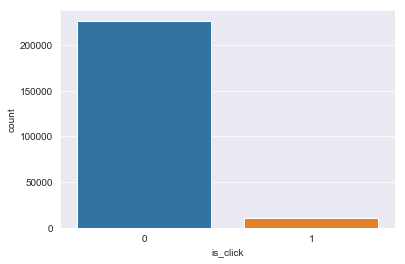

In [15]:
sns.countplot(train['is_click']);

In [16]:
train['is_click'].value_counts()/len(train)

0    0.954286
1    0.045714
Name: is_click, dtype: float64

In [17]:
train['impression_time'] = pd.to_datetime(train['impression_time'])

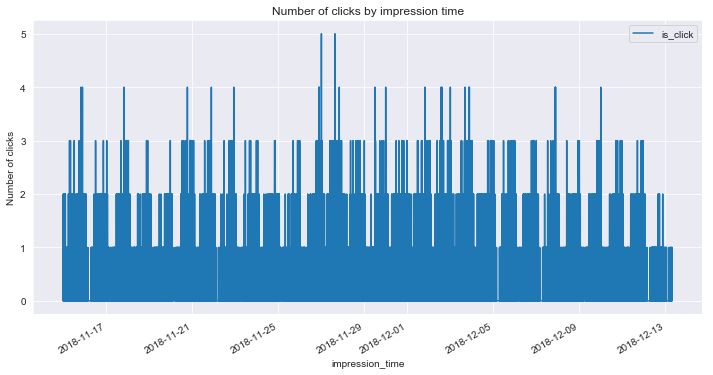

In [18]:
train.groupby('impression_time').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by impression time');

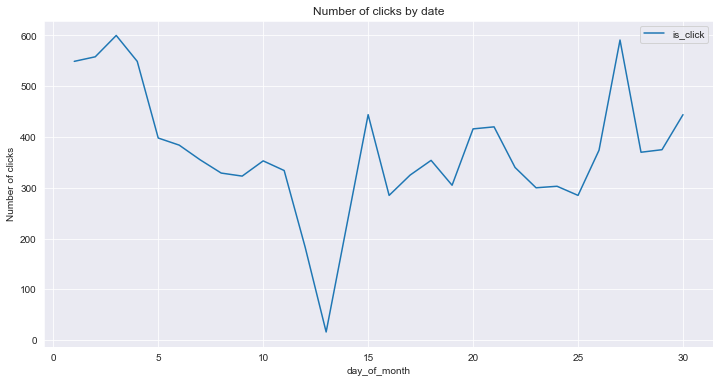

In [19]:
train['day_of_month'] = train['impression_time'].apply(lambda x: x.day)
train.groupby('day_of_month').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by date');

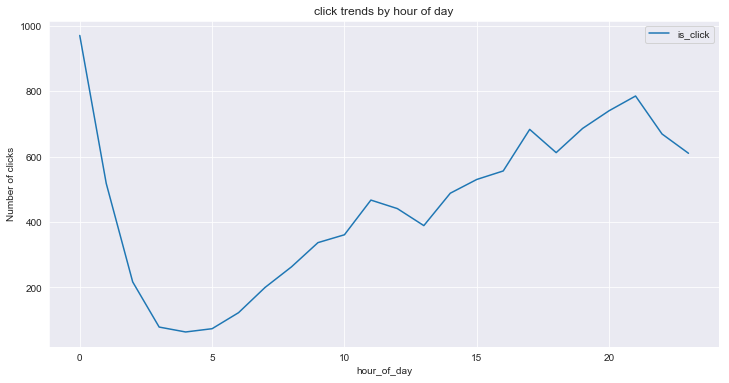

In [20]:
train['hour_of_day'] = train['impression_time'].apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

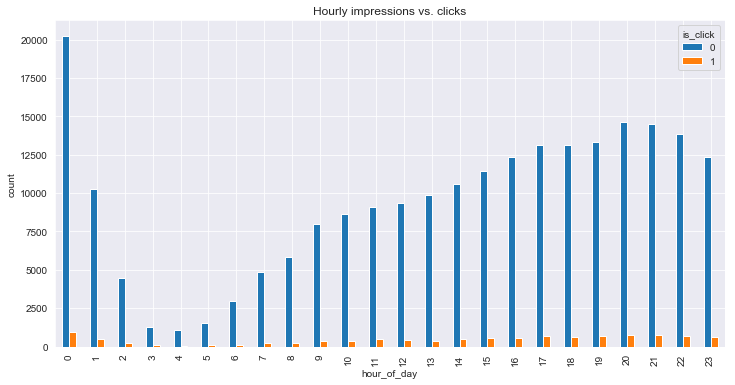

In [21]:
train.groupby(['hour_of_day', 'is_click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

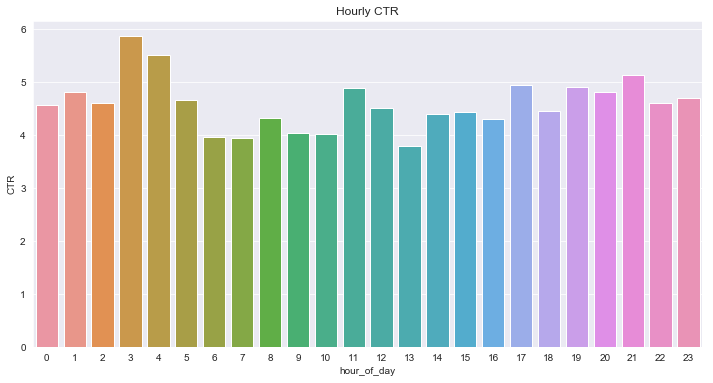

In [22]:
df_click = train[train['is_click'] == 1]
df_hour = train[['hour_of_day','is_click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'is_click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','is_click']].groupby(['hour_of_day']).count().reset_index()['is_click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

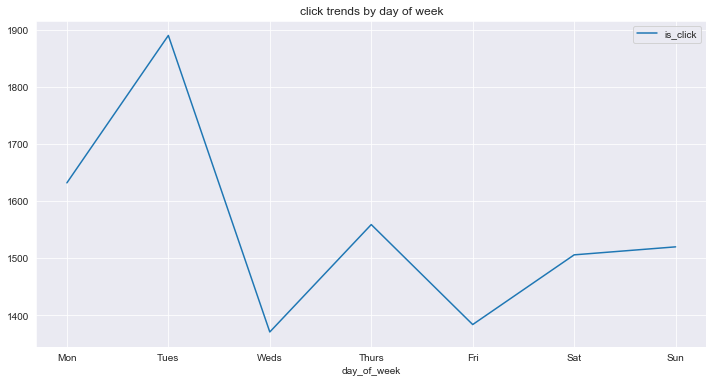

In [23]:
train['day_of_week'] = train['impression_time'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'is_click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

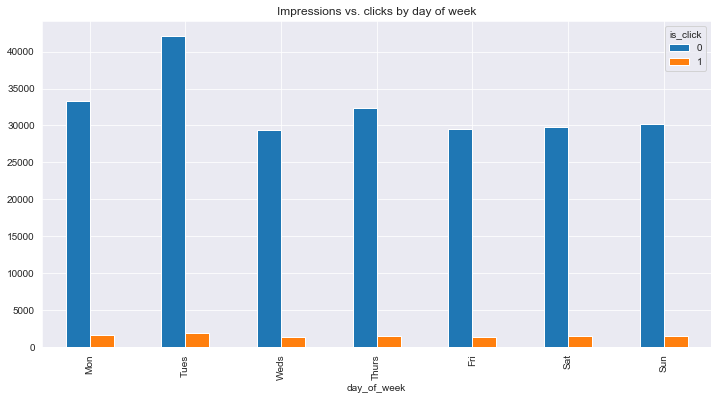

In [24]:
train.groupby(['day_of_week','is_click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

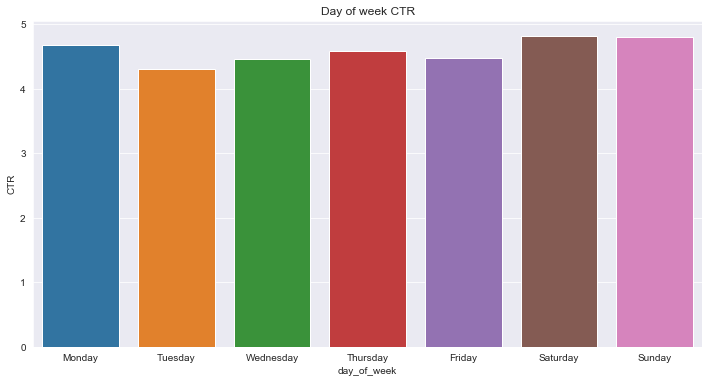

In [25]:
df_click = train[train['is_click'] == 1]
df_dayofweek = train[['day_of_week','is_click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'is_click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','is_click']].groupby(['day_of_week']).count().reset_index()['is_click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

In [26]:
train['os_version'].value_counts()/len(train)

latest          0.543818
intermediate    0.233758
old             0.222424
Name: os_version, dtype: float64

In [27]:
osVersion = train['os_version'].unique()
osVersion.sort()
ctr_avg_list=[]
for i in osVersion:
    ctr_avg=train.loc[np.where((train['os_version'] == i))]['is_click'].mean()
    ctr_avg_list.append(ctr_avg)
    print("for os_version: {},  click through rate: {}".format(i,ctr_avg))

for os_version: intermediate,  click through rate: 0.051761698143780496
for os_version: latest,  click through rate: 0.04165118870728083
for os_version: old,  click through rate: 0.04929044465468307


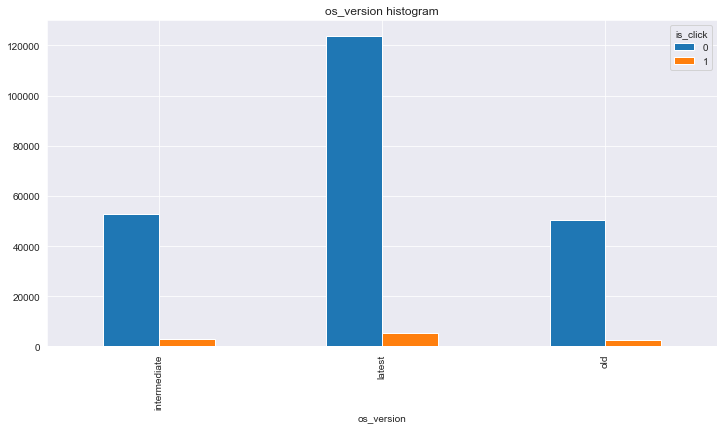

In [28]:
train.groupby(['os_version', 'is_click']).size().unstack().plot(kind='bar', figsize=(12,6), title='os_version histogram');

In [29]:
train['is_4G'].value_counts()/len(train)

0    0.638688
1    0.361312
Name: is_4G, dtype: float64

In [30]:
is4G = train['is_4G'].unique()
is4G.sort()
ctr_avg_list=[]
for i in is4G:
    ctr_avg=train.loc[np.where((train['is_4G'] == i))]['is_click'].mean()
    ctr_avg_list.append(ctr_avg)
    print("for is_4G: {},  click through rate: {}".format(i,ctr_avg))

for is_4G: 0,  click through rate: 0.04625785790534931
for is_4G: 1,  click through rate: 0.04475195396675636


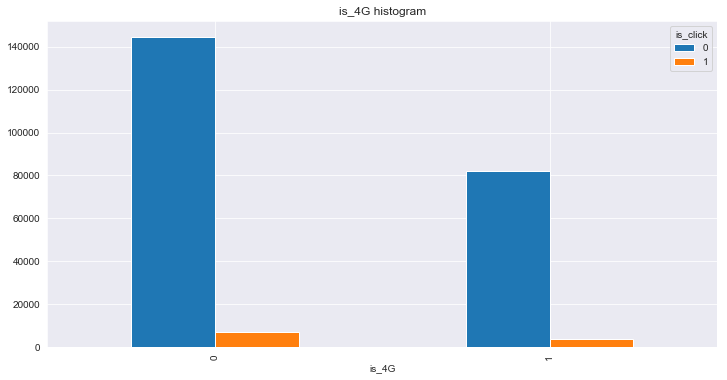

In [31]:
train.groupby(['is_4G', 'is_click']).size().unstack().plot(kind='bar', figsize=(12,6), title='is_4G histogram');

In [32]:
train.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,day_of_month,hour_of_day,day_of_week
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,15,0,Thursday
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,15,0,Thursday
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,15,0,Thursday
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,15,0,Thursday
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,15,0,Thursday


In [33]:
train.drop(['day_of_month','hour_of_day','day_of_week'], axis=1, inplace=True)

### Data pre-processing

In [34]:
df = train.append(test, ignore_index=True, sort=False)
df.shape

(328284, 7)

In [35]:
df.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0.0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1.0


In [36]:
calc = df.groupby(['user_id'], axis=0).agg({'app_code': 'count'}).reset_index()
calc.columns = ['user_id','app_code_count_by_user_id']
df = df.merge(calc, on=['user_id'],how='left')

calc = df.groupby(['user_id'], axis=0).agg({'is_4G': 'sum'}).reset_index()
calc.columns = ['user_id','is_4G_count_by_user_id']
df = df.merge(calc, on=['user_id'],how='left')

In [37]:
df.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,app_code_count_by_user_id,is_4G_count_by_user_id
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0.0,3,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1.0,61,61


In [38]:
df = pd.get_dummies(df, columns=['app_code', 'os_version'], drop_first=True)

In [39]:
item.head(2)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822


In [40]:
view.head(2)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640


In [41]:
view_item = view.merge(item, how='left', on='item_id')
view_item.head(2)

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0


In [42]:
view_item.shape

(3118622, 10)

In [43]:
view_item = pd.get_dummies(view_item, columns=['device_type','category_1'], drop_first=True)

In [44]:
view_item.columns

Index(['server_time', 'session_id', 'user_id', 'item_id', 'item_price',
       'category_2', 'category_3', 'product_type', 'device_type_iphone',
       'device_type_web', 'category_1_1.0', 'category_1_2.0', 'category_1_4.0',
       'category_1_5.0', 'category_1_6.0', 'category_1_7.0', 'category_1_8.0',
       'category_1_9.0', 'category_1_10.0', 'category_1_11.0',
       'category_1_12.0', 'category_1_13.0', 'category_1_14.0',
       'category_1_15.0', 'category_1_16.0', 'category_1_17.0'],
      dtype='object')

In [45]:
agg_func = {
    'device_type_iphone': ['max'],
    'device_type_web': ['max'],
    'item_id': ['count'],
    'item_price': ['sum', 'mean'],
    'category_1_1.0': ['min','max','count','mean','sum'],
    'category_1_2.0': ['min','max','count','mean','sum'],
    'category_1_4.0': ['min','max','count','mean','sum'],
    'category_1_5.0': ['min','max','count','mean','sum'],
    'category_1_6.0': ['min','max','count','mean','sum'],
    'category_1_7.0': ['min','max','count','mean','sum'],
    'category_1_8.0': ['min','max','count','mean','sum'],
    'category_1_9.0': ['min','max','count','mean','sum'],
    'category_1_10.0': ['min','max','count','mean','sum'],
    'category_1_11.0': ['min','max','count','mean','sum'],
    'category_1_12.0': ['min','max','count','mean','sum'],
    'category_1_13.0': ['min','max','count','mean','sum'],
    'category_1_14.0': ['min','max','count','mean','sum'],
    'category_1_15.0': ['min','max','count','mean','sum'],
    'category_1_16.0': ['min','max','count','mean','sum'],
    'category_1_17.0': ['min','max','count','mean','sum'],
    'category_2': ['min', 'max', 'count', 'mean'],
    'category_3': ['min', 'max', 'count', 'mean'],
    'product_type': ['min', 'max', 'count']
}

In [46]:
view_item1 = view_item.groupby('user_id').agg(agg_func)

In [47]:
view_item1.columns = ['J_' + '_'.join(col).strip() for col in view_item1.columns.values]
view_item1.reset_index(inplace=True)
view_item1.head()

,user_id,J_device_type_iphone_max,J_device_type_web_max,J_item_id_count,J_item_price_sum,J_item_price_mean,J_category_1_1.0_min,J_category_1_1.0_max,J_category_1_1.0_count,J_category_1_1.0_mean,...,J_category_2_max,J_category_2_count,J_category_2_mean,J_category_3_min,J_category_3_max,J_category_3_count,J_category_3_mean,J_product_type_min,J_product_type_max,J_product_type_count
0,0,0,0,42,394618.0,9395.666667,0,1,42,0.166667,...,79.0,42,36.214286,30.0,308.0,42,171.571429,60.0,10457.0,42
1,1,0,0,8,31574.0,3946.750000,0,0,8,0.000000,...,78.0,8,44.625000,44.0,277.0,8,143.375000,3303.0,10112.0,8
2,2,0,0,165,2443569.0,14809.509091,0,1,165,0.187879,...,78.0,165,37.654545,4.0,336.0,165,183.854545,20.0,10561.0,165
3,3,0,0,8,58059.0,7257.375000,0,1,8,0.375000,...,62.0,8,40.500000,50.0,157.0,8,113.375000,491.0,6659.0,8
4,4,0,0,2,60229.0,30114.500000,0,0,2,0.000000,...,61.0,2,32.000000,27.0,159.0,2,93.000000,234.0,4426.0,2


In [48]:
df = df.merge(view_item1, on='user_id', how='left')
df.shape

(328284, 626)

In [49]:
df.drop(['user_id','impression_id','impression_time'], axis=1, inplace=True)

In [50]:
train_df = df[df['is_click'].isnull()!=True]
test_df = df[df['is_click'].isnull()==True]
test_df.drop('is_click', axis=1, inplace=True)

In [51]:
train_df.shape, test_df.shape

((237609, 623), (90675, 622))

### Train test split

In [52]:
X = train_df.drop(labels=['is_click'], axis=1)
y = train_df['is_click'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [53]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((178206, 622), (178206,), (59403, 622), (59403,))

### Build the model

In [54]:
from math import sqrt 
from sklearn.metrics import roc_auc_score

In [55]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.07, n_estimators=1000, 
                      min_child_weight=0.01, colsample_bytree=0.5, random_state=0)

lgbm.fit(X_train, y_train,
         eval_set=[(X_cv, y_cv)],
         eval_metric='auc',
         early_stopping_rounds=100,
         verbose=100)

y_pred = lgbm.predict_proba(X_cv)[:,-1]

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.738126	valid_0's binary_logloss: 0.169757
[200]	valid_0's auc: 0.74354	valid_0's binary_logloss: 0.168735
[300]	valid_0's auc: 0.744769	valid_0's binary_logloss: 0.168466
[400]	valid_0's auc: 0.74514	valid_0's binary_logloss: 0.168429
Early stopping, best iteration is:
[389]	valid_0's auc: 0.745218	valid_0's binary_logloss: 0.16841


In [56]:
roc_auc_score(y_cv, y_pred)

0.745217567904112

### Predict on test set

In [57]:
Xtest = test_df

In [58]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=1994)
i=1

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.07, n_estimators=1000, 
                          min_child_weight=0.01, colsample_bytree=0.5, random_state=0)
    
    lgbm.fit(X_train, y_train, eval_set=[(X_cv, y_cv)], eval_metric='auc', early_stopping_rounds=100, verbose=100)
    preds = lgbm.predict_proba(X_test)[:,-1]
    
    print("ROC_AUC Score: ", roc_auc_score(y_test, preds))
    err.append(roc_auc_score(y_test,preds))
    p = lgbm.predict_proba(Xtest)[:,-1]
    print(f'--------------------Fold {i} completed !!!------------------')
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.784245	valid_0's binary_logloss: 0.162723
[200]	valid_0's auc: 0.820579	valid_0's binary_logloss: 0.156223
[300]	valid_0's auc: 0.844771	valid_0's binary_logloss: 0.151152
[400]	valid_0's auc: 0.863371	valid_0's binary_logloss: 0.146849
[500]	valid_0's auc: 0.877285	valid_0's binary_logloss: 0.143099
[600]	valid_0's auc: 0.888866	valid_0's binary_logloss: 0.1397
[700]	valid_0's auc: 0.898138	valid_0's binary_logloss: 0.136537
[800]	valid_0's auc: 0.905485	valid_0's binary_logloss: 0.133797
[900]	valid_0's auc: 0.911598	valid_0's binary_logloss: 0.131117
[1000]	valid_0's auc: 0.916088	valid_0's binary_logloss: 0.128878
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.916088	valid_0's binary_logloss: 0.128878
ROC_AUC Score:  0.7474061602034264
--------------------Fold 1 completed !!!------------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's a

--------------------Fold 9 completed !!!------------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.786286	valid_0's binary_logloss: 0.162593
[200]	valid_0's auc: 0.823633	valid_0's binary_logloss: 0.155933
[300]	valid_0's auc: 0.846625	valid_0's binary_logloss: 0.151066
[400]	valid_0's auc: 0.862477	valid_0's binary_logloss: 0.147152
[500]	valid_0's auc: 0.87731	valid_0's binary_logloss: 0.143423
[600]	valid_0's auc: 0.888124	valid_0's binary_logloss: 0.140056
[700]	valid_0's auc: 0.898182	valid_0's binary_logloss: 0.136925
[800]	valid_0's auc: 0.904878	valid_0's binary_logloss: 0.134328
[900]	valid_0's auc: 0.910502	valid_0's binary_logloss: 0.131861
[1000]	valid_0's auc: 0.91527	valid_0's binary_logloss: 0.129593
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.91527	valid_0's binary_logloss: 0.129593
ROC_AUC Score:  0.7458619781932754
--------------------Fold 10 completed !!!------------------


In [59]:
err_avg = np.mean(err,0)
err_avg

0.7435872553146919

In [60]:
y_pred = np.mean(y_pred_tot,0)
y_pred

array([0.01168516, 0.00212999, 0.05059397, ..., 0.02060592, 0.24435592,
       0.4930188 ])

In [61]:
len(y_pred)

90675

### Submission

In [62]:
sub['is_click'] = y_pred

In [63]:
sub.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.011685
1,caac14a5bf2ba283db7708bb34855760,0.002130
2,13f10ba306a19ce7bec2f3cae507b698,0.050594
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.009661
4,bf5a572cca75f5fc67f4b14e58b11d70,0.133262


In [64]:
sub.to_csv('sub2_10fold_lgbm.csv', index=False)